<h1> Bước 1: </h1> Cài đặt thư viện và chương trình

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from keras.models import load_model, Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM, Dense, Dropout

<h1> Bước 2:</h1> Sử dụng, khai thác thông tin dữ liệu

In [2]:
data = pd.read_csv('Data.csv')
data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d')

In [3]:
print(f"Số lượng dữ liệu: {data.shape[0]}x{data.shape[1]}")

Số lượng dữ liệu: 3776x7


In [4]:
data.drop(["Volume", "Adj Close"], axis=1, inplace=True)
data.head() # 5 dòng đầu

,Date,Open,High,Low,Close
0,2003-12-31,4.045714,4.091429,3.880714,3.906429
1,2004-01-02,4.107143,4.127857,3.842143,3.916429
2,2004-01-05,3.892857,4.061429,3.875000,3.992857
3,2004-01-06,3.946429,4.339286,3.937143,4.257857
4,2004-01-07,4.307143,4.470000,4.249286,4.445714


In [5]:
data.info() # Thông tin của từng cột dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3776 non-null   datetime64[ns]
 1   Open    3776 non-null   float64       
 2   High    3776 non-null   float64       
 3   Low     3776 non-null   float64       
 4   Close   3776 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 147.6 KB


In [6]:
data.describe() # Thông tin từng cột dữ liệu

,Date,Open,High,Low,Close
count,3776,3776.000000,3776.000000,3776.000000,3776.000000
mean,2011-07-01 09:04:11.694915328,56.653638,57.552998,55.681395,56.643953
min,2003-12-31 00:00:00,1.300000,1.317143,1.272857,1.290000
25%,2007-10-01 18:00:00,4.082857,4.156786,3.992857,4.094286
50%,2011-06-29 12:00:00,15.432143,15.760714,15.046429,15.395000
75%,2015-04-01 06:00:00,68.606428,69.155716,67.800713,68.397860
max,2018-12-31 00:00:00,421.380005,423.209991,413.079987,418.970001
std,NaN,85.461244,86.790599,83.904099,85.372837


<h3> Tính tỷ suất lợi nhuận </h3>

In [7]:
Profit_Margin = pd.DataFrame() # DataFrame này có tác dụng dùng để chứa giá trị tỷ suất lợi nhuận cho từng ngày
Profit_Margin['Profit_Margin__Open'] = data['Open'].pct_change()
Profit_Margin['Profit_Margin__High'] = data['High'].pct_change()
Profit_Margin['Profit_Margin__Low'] = data['Low'].pct_change()
Profit_Margin['Profit_Margin__Close'] = data['Close'].pct_change()
Profit_Margin.insert(0, 'Date', data['Date'])
Profit_Margin = Profit_Margin.dropna()
Profit_Margin.head()

,Date,Profit_Margin__Open,Profit_Margin__High,Profit_Margin__Low,Profit_Margin__Close
1,2004-01-02,0.015184,0.008903,-0.009939,0.002560
2,2004-01-05,-0.052174,-0.016093,0.008552,0.019515
3,2004-01-06,0.013762,0.068414,0.016037,0.066369
4,2004-01-07,0.091403,0.030123,0.079282,0.044120
5,2004-01-08,0.053897,0.021093,0.009918,-0.002892


<h3>Trực quan hóa dữ liệu</h3>

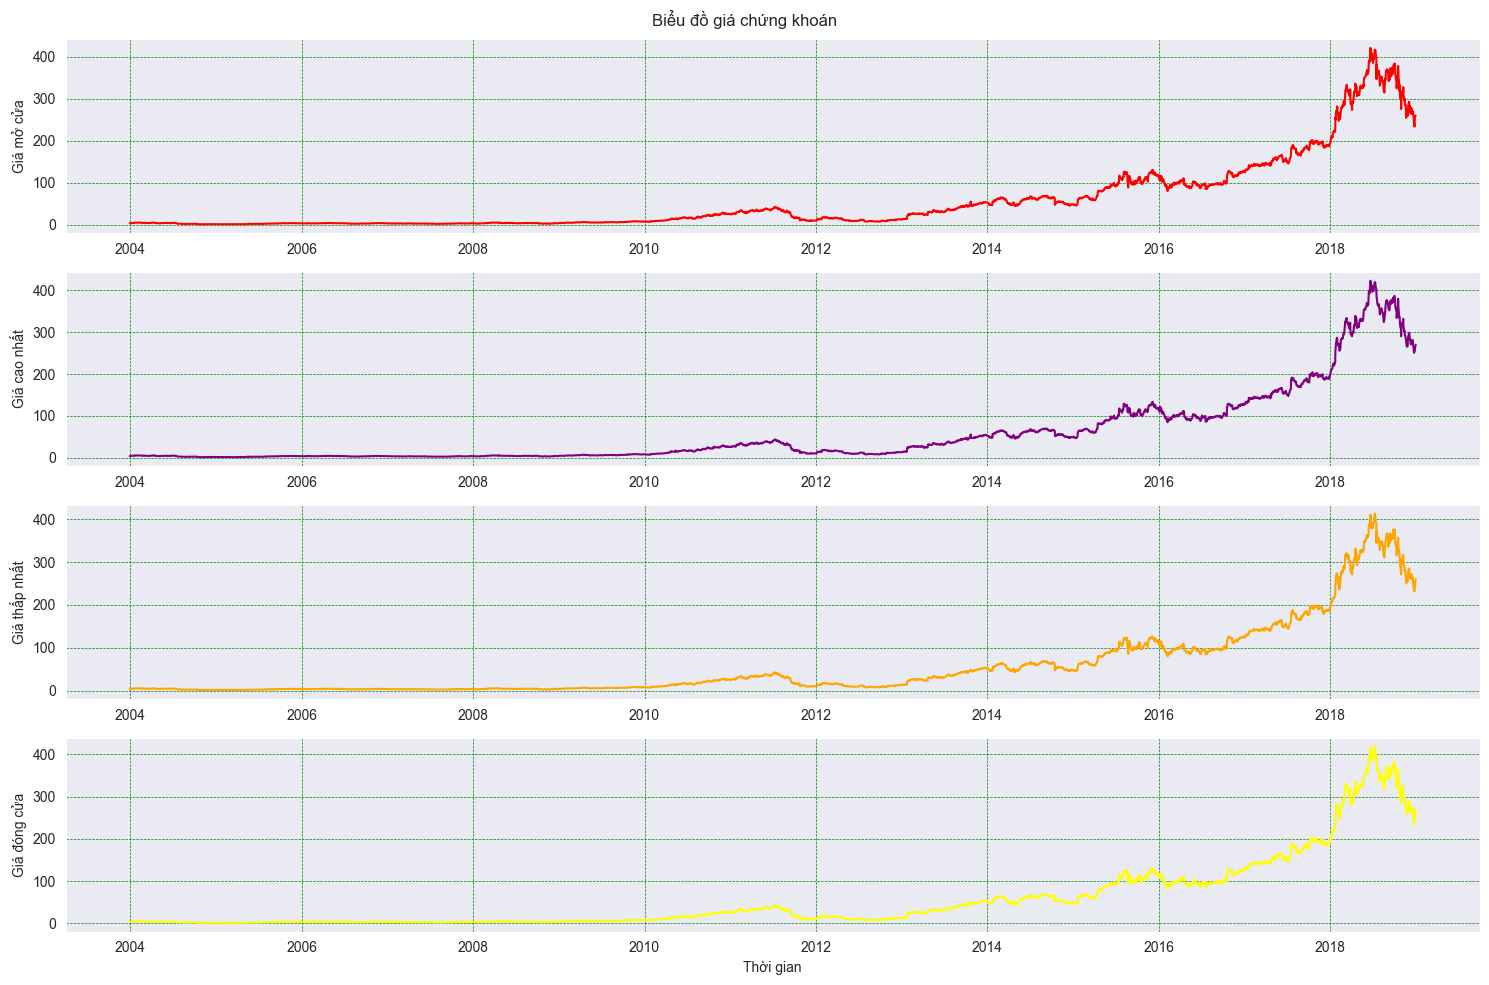

In [8]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))

# Biểu đồ giá mở cửa
axs[0].plot(data["Date"], data['Open'], color="red")
axs[0].set_ylabel("Giá mở cửa")
axs[0].grid(color='green', linestyle='--', linewidth=0.5)

# Biểu đồ giá cao nhất
axs[1].plot(data["Date"], data['High'], color="purple")
axs[1].set_ylabel("Giá cao nhất")
axs[1].grid(color='green', linestyle='--', linewidth=0.5)

# Biểu đồ giá thấp nhất
axs[2].plot(data["Date"], data['Low'], color="orange")
axs[2].set_ylabel("Giá thấp nhất")
axs[2].grid(color='green', linestyle='--', linewidth=0.5)

# Biểu đồ giá đóng cửa
axs[3].plot(data["Date"], data['Close'], color="yellow")
axs[3].set_ylabel("Giá đóng cửa")
axs[3].grid(color='green', linestyle='--', linewidth=0.5)

# Đặt tiêu đề chung cho biểu đồ
fig.suptitle("Biểu đồ giá chứng khoán")

# Định dạng đồ thị
plt.xlabel("Thời gian")
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

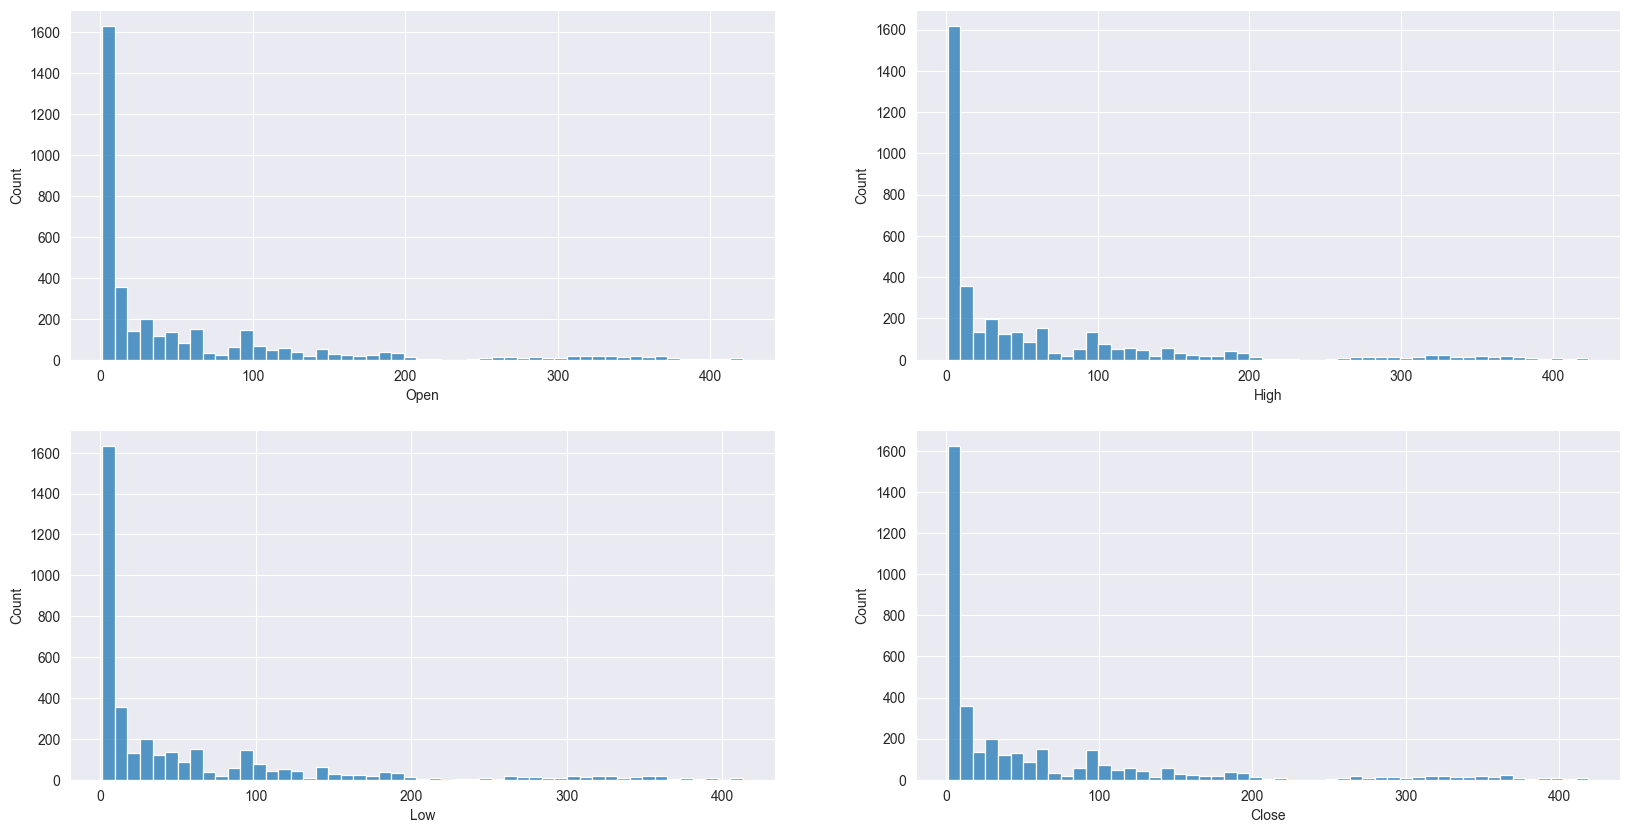

In [9]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close']

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, col in enumerate(features):
    sb.histplot(data[col], ax=axes[i // 2, i % 2])
plt.show()



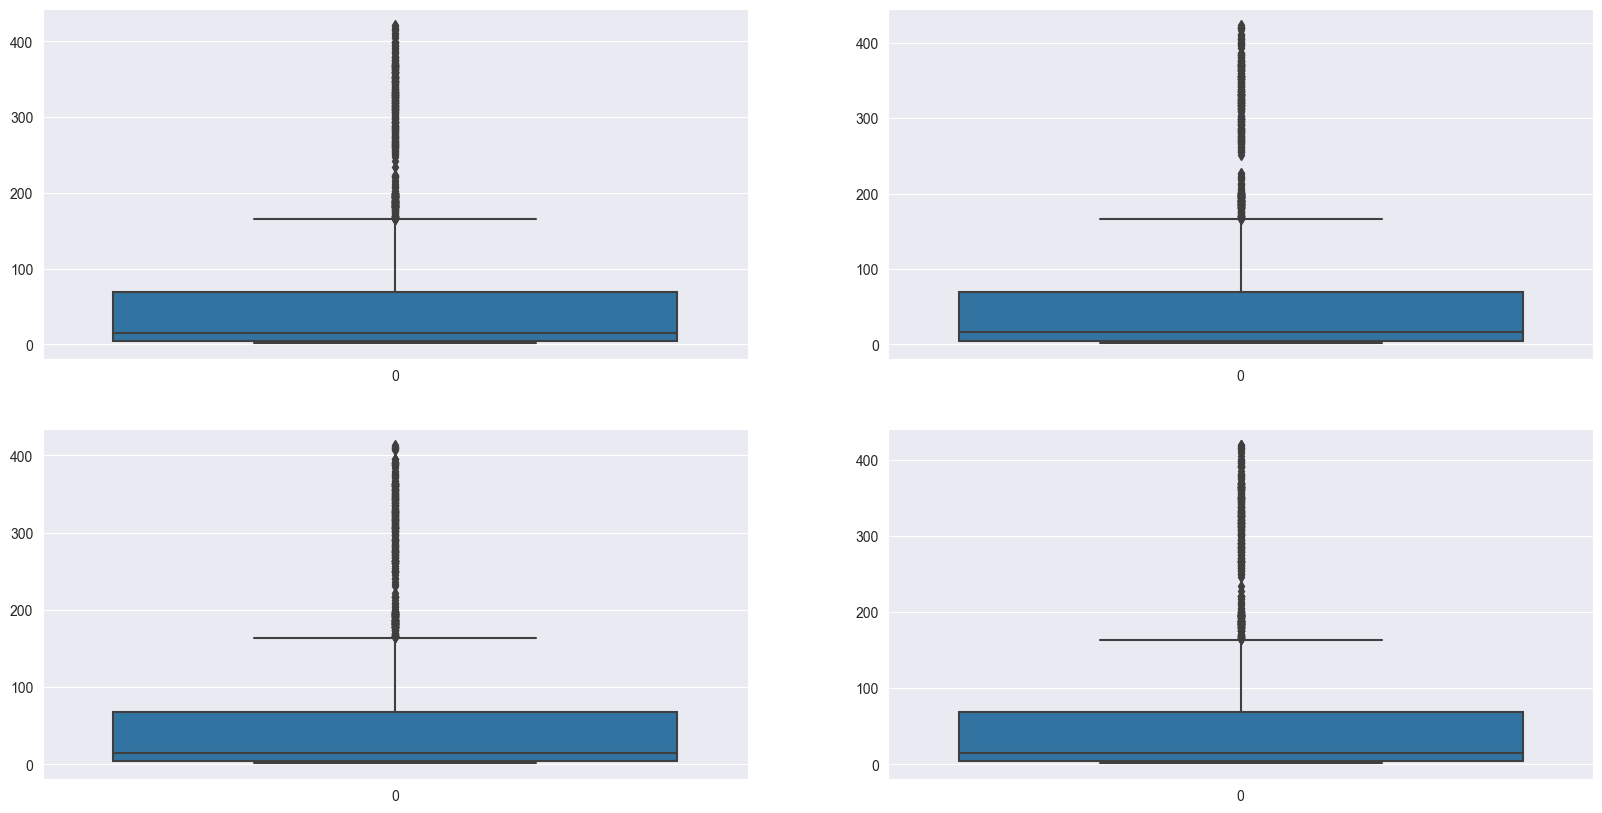

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, col in enumerate(features):
    sb.boxplot(data[col], ax=axes[i // 2, i % 2])
plt.show()

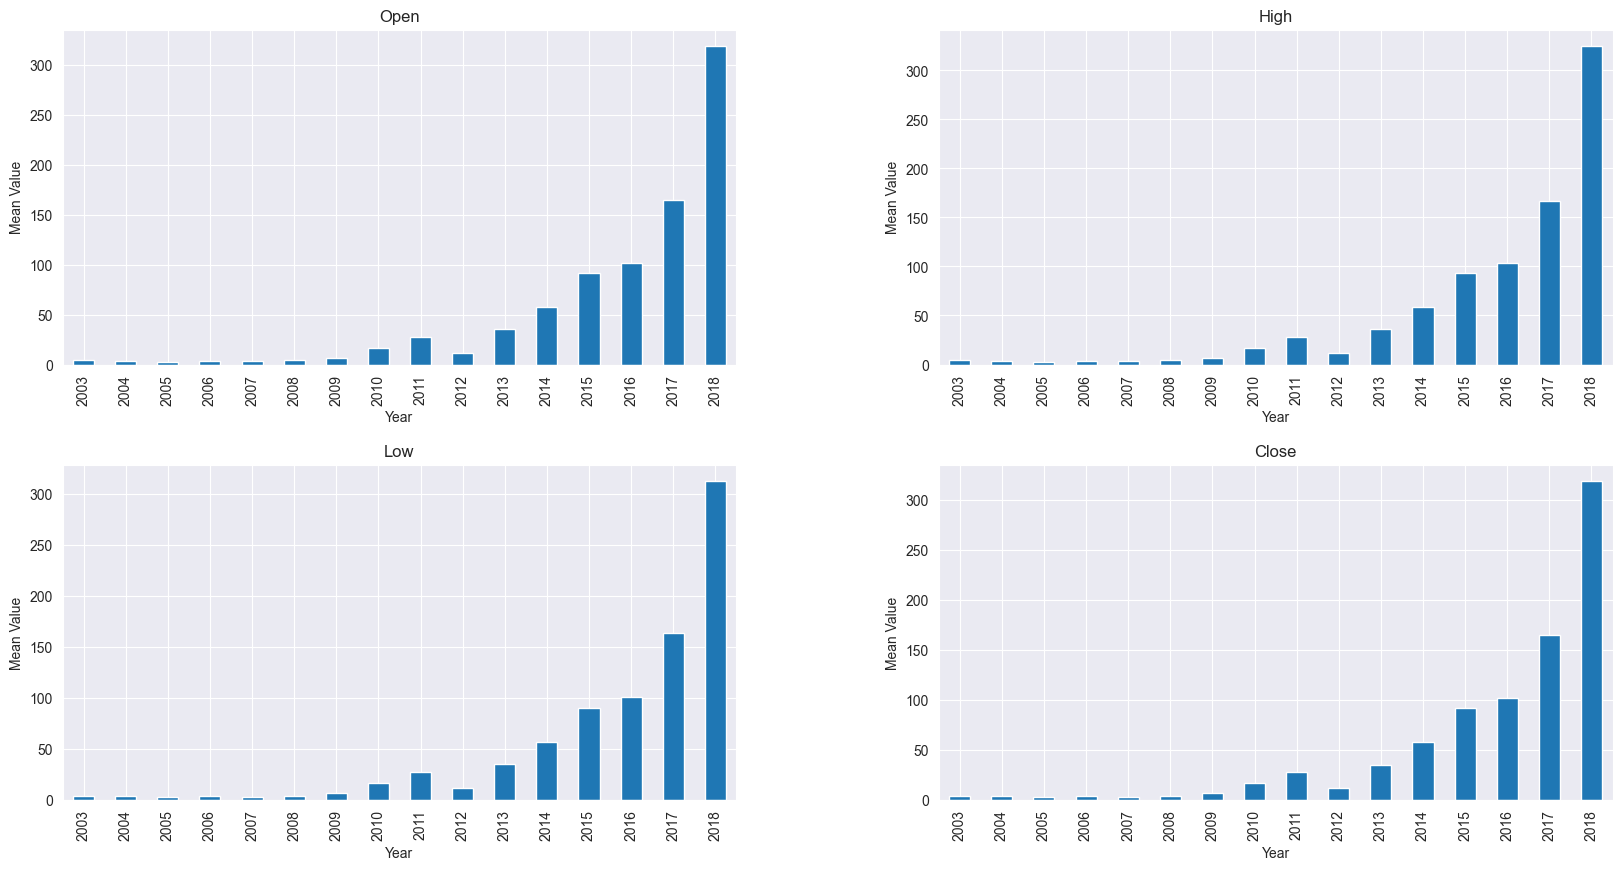

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data_grouped = data.groupby('Year').mean()

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    ax = axes[i // 2, i % 2]
    data_grouped[col].plot.bar(ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Value')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

<h1> Bước 3:</h1> Sử dụng dữ liệu để thực hiện huấn luyện cho mô hình

In [12]:
# Tăng tốc độ xử lý của mô hình bằng cách chuẩn hóa lại dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
columns = ['Open', 'High', 'Low', 'Close']
scaler_data = scaler.fit_transform(data[columns].values)
scaler_data

array([[0.00653617, 0.00657581, 0.00633271, 0.0062642 ],
       [0.0066824 , 0.00666215, 0.00623905, 0.00628814],
       [0.00617229, 0.0065047 , 0.00631884, 0.00647112],
       ...,
       [0.59229194, 0.60269534, 0.57994904, 0.60879143],
       [0.61093125, 0.61767546, 0.60350375, 0.61001242],
       [0.61621596, 0.63708798, 0.62827262, 0.63773703]])

In [18]:
prediction_days = 30
X_train, y_train = [], []
for i in range(prediction_days, len(scaler_data)):
    # X_train.append(scaler_data.iloc[i-prediction_days:i].values.flatten())
    X_train.append(scaler_data[i-30:i].flatten())
    # y_train.append(scaler_data.iloc[i].values)
    y_train.append(scaler_data[i])
# Chuyển đổi X và y thành mảng NumPy
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Kích thước của X:', X_train.shape)
print('Kích thước của y:', y_train.shape)

Kích thước của X: (3746, 120, 1)
Kích thước của y: (3746, 4)


In [14]:
X_train

[array([0.00653617, 0.00657581, 0.00633271, 0.0062642 , 0.0066824 ,
        0.00666215, 0.00623905, 0.00628814, 0.00617229, 0.0065047 ,
        0.00631884, 0.00647112, 0.00629982, 0.0071633 , 0.00646974,
        0.00710558, 0.0071585 , 0.00747312, 0.00722773, 0.00755534,
        0.00771112, 0.00769661, 0.00733006, 0.00752456, 0.00722992,
        0.00773047, 0.00738903, 0.0075143 , 0.00748837, 0.00781512,
        0.00751219, 0.00786487, 0.00785224, 0.00797088, 0.00790245,
        0.00808035, 0.00795767, 0.00807754, 0.00804468, 0.00804444,
        0.00794407, 0.00796072, 0.00792326, 0.00799142, 0.00794917,
        0.00797765, 0.00806376, 0.0081231 , 0.00809029, 0.00859561,
        0.00821466, 0.00849762, 0.00847117, 0.00845001, 0.00829272,
        0.00816414, 0.00979235, 0.01028697, 0.00960921, 0.01019236,
        0.01008311, 0.01021078, 0.00992837, 0.01016499, 0.00991308,
        0.00992804, 0.00996132, 0.00995294, 0.00982806, 0.01034454,
        0.00990235, 0.00976995, 0.00967843, 0.00

In [15]:
y_train

[array([0.00968863, 0.00978583, 0.00920681, 0.00906709]),
 array([0.00918192, 0.0091357 , 0.00888072, 0.00897817]),
 array([0.00897108, 0.00910184, 0.00898826, 0.00896448]),
 array([0.00903909, 0.00906798, 0.00865176, 0.00859168]),
 array([0.00840996, 0.00885804, 0.00820079, 0.00901237]),
 array([0.00843377, 0.00901719, 0.00863442, 0.00888924]),
 array([0.0076244 , 0.00776094, 0.00740638, 0.0075827 ]),
 array([0.00747477, 0.00754762, 0.00751392, 0.00755192]),
 array([0.00738635, 0.00843139, 0.00753473, 0.00840356]),
 array([0.00846778, 0.00871921, 0.00836383, 0.00867718]),
 array([0.0085868 , 0.00888513, 0.00878012, 0.00879689]),
 array([0.00872283, 0.00878016, 0.00884256, 0.0086977 ]),
 array([0.00861741, 0.00859392, 0.00836036, 0.00820519]),
 array([0.00817191, 0.00813341, 0.00818691, 0.0080889 ]),
 array([0.00797807, 0.00842462, 0.00812447, 0.00829069]),
 array([0.00816171, 0.00825531, 0.00794061, 0.00784948]),
 array([0.00780124, 0.00776433, 0.0076284 , 0.0075656 ]),
 array([0.0074

In [19]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
save_model = 'save_Model.hdf5'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto') # Tìm mô hình huấn luyện tốt nhất
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.00383, saving model to save_Model.hdf5
75/75 - 21s - loss: 0.0038 - 21s/epoch - 274ms/step
Epoch 2/100

Epoch 2: loss improved from 0.00383 to 0.00170, saving model to save_Model.hdf5
75/75 - 19s - loss: 0.0017 - 19s/epoch - 248ms/step
Epoch 3/100

Epoch 3: loss improved from 0.00170 to 0.00143, saving model to save_Model.hdf5
75/75 - 18s - loss: 0.0014 - 18s/epoch - 244ms/step
Epoch 4/100

Epoch 4: loss improved from 0.00143 to 0.00116, saving model to save_Model.hdf5
75/75 - 18s - loss: 0.0012 - 18s/epoch - 237ms/step
Epoch 5/100

Epoch 5: loss did not improve from 0.00116
75/75 - 14s - loss: 0.0012 - 14s/epoch - 190ms/step
Epoch 6/100

Epoch 6: loss improved from 0.00116 to 0.00114, saving model to save_Model.hdf5
75/75 - 14s - loss: 0.0011 - 14s/epoch - 192ms/step
Epoch 7/100

Epoch 7: loss improved from 0.00114 to 0.00105, saving model to save_Model.hdf5
75/75 - 15s - loss: 0.0010 - 15s/epoch - 203ms/step
Epoch 8/100

Epoch 8: loss

KeyboardInterrupt: 